In [127]:
from collections import defaultdict
# {Legend}, {log}, {Graph Title}
FNAME="../jobs/logo_learning_curves"
curves = defaultdict(list)
with open(FNAME) as f:
    lines = [line.strip()for line in f.readlines() if (not line.startswith("#") and len(line.strip()) > 0)]
    for line in lines:
        legend, log, title = line.split(",")
        curves[title.strip()].append((legend.strip(), log.strip()))

In [128]:
# TODO -- manually add the last ordering
# TODO -- figure out how to get these into a dataframe with a legend

In [129]:
PREFIX = '~/Desktop/zyzzyva/code/ec/jobs/'
def extract_curves(log_output, max_iter=18, n_tasks = 111):
    log_output = log_output.split("\\n")
    iters = int(len(log_output) / 2)*2
    
    xs, ys = [], []
    for i in range(0,iters ,2):
        try:
            iter_line, hits_line = log_output[i], log_output[i+1]
            iter = int(iter_line.split(": ")[-1])
            hits = int(hits_line.split()[1].split("/")[0])
            if iter < max_iter:
                xs.append(iter)
                ys.append(float(hits / n_tasks) * 100)
            
        except:
            pass
    if len(xs) > 0:
        if xs[0] != 0:
            xs, ys = [0] + xs, [0] + ys
    return xs, ys
        
import subprocess
curve_vals = defaultdict(lambda: defaultdict(list))
for curve in curves:
    print(f"Graph: {curve} with n={len(curves[curve])}")
    for legend, log in curves[curve]:
        p = subprocess.Popen(f"grep -a 'testing tasks' {PREFIX}{log}", stdout=subprocess.PIPE, shell=True)
        output,_ = p.communicate() 
        output = str(output)
        if len(output.strip()) < 2:
            print(f"No output for: {log}")
        else:
            xs, ys = extract_curves(output)
            curve_vals[curve][legend].append((xs, ys))

Graph: "Random Curriculum" with n=15
Graph: "Sentence Length Curriculum" with n=2
Graph: "Supervision - 10 tasks" with n=4


In [130]:
# Print a table of the best model and the average values for each run
for curve in curve_vals:
    print(f"{curve}")
    for legend in curve_vals[curve]:
        max_vals = [max(ys) for (xs, ys) in curve_vals[curve][legend]]
        print(f"{legend} | Best : {round(np.max(max_vals), 2)} | Average: {round(np.mean(max_vals), 2)} | ")
    print("\n")

"Random Curriculum"
Dreamcoder CNN Baseline | Best : 43.24 | Average: 36.26 | 
Generative Language | Best : 86.49 | Average: 51.13 | 
Language only | Best : 45.95 | Average: 32.66 | 
Pseudoalignments | Best : 45.05 | Average: 40.84 | 


"Sentence Length Curriculum"
Dreamcoder CNN Baseline | Best : 29.73 | Average: 29.73 | 
Generative Language | Best : 55.86 | Average: 55.86 | 


"Supervision - 10 tasks"


ValueError: max() arg is an empty sequence

In [125]:
def build_dataframe(curve_vals, curve):
    # For a given plot, extract all of the 
    iterations = []
    solved_tasks = []
    model = []
    for pal_idx, legend in enumerate(curve_vals[curve]):
        for xs, ys in curve_vals[curve][legend]:
            iterations += xs
            solved_tasks += ys
            model += [legend] * len(xs)
    d = {
            "Iterations" : iterations,
            "% Solved tasks" : solved_tasks,
            "Model" : model
    }
    return pd.DataFrame(data=d)

<Figure size 432x216 with 0 Axes>

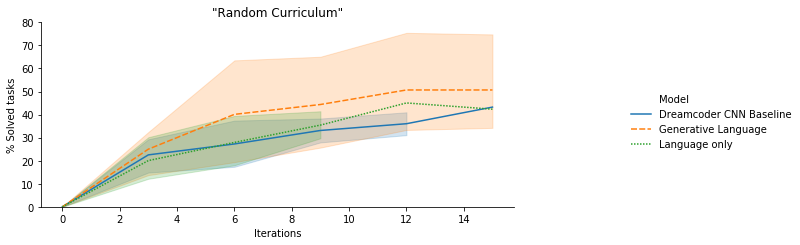

<Figure size 432x216 with 0 Axes>

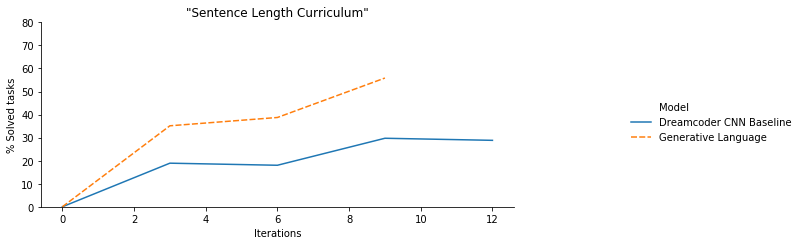

<Figure size 432x216 with 0 Axes>

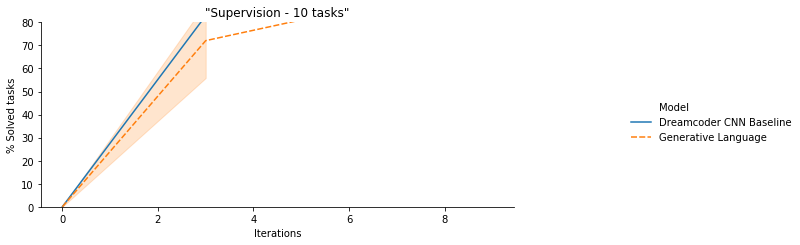

In [126]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
for curve in curve_vals:
    f = plt.figure(figsize=(6,3))
    df = build_dataframe(curve_vals, curve)
    ax = sns.relplot(x="Iterations", y="% Solved tasks",
                hue="Model", style="Model",
                kind="line", data=df)
    ax.fig.set_size_inches(12,3)
    ax.axes[0,0].set_ylim(0, 80)
    plt.title(f"{curve}")
#     ax.set_title(f"{curve}")
#     ax.set(ylim=(0, 111))
#     ax.set(xticks=(np.arange(0, 16)))
#     ax.set(yticks=(np.arange(0, 111, 10)))

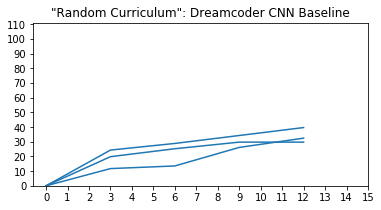

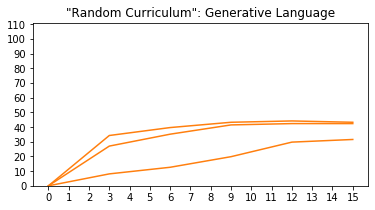

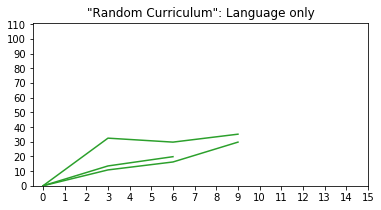

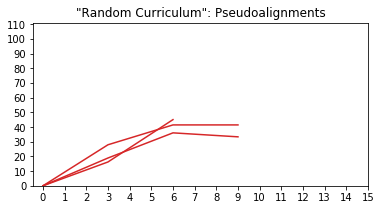

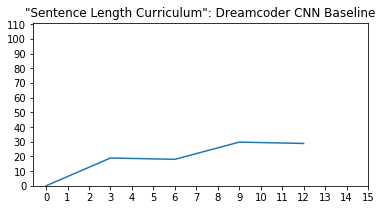

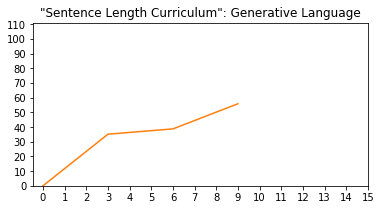

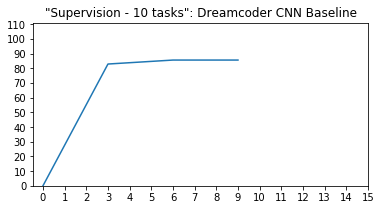

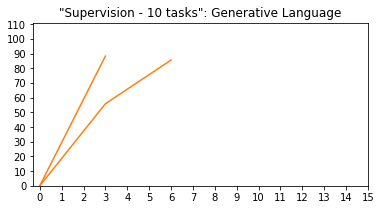

In [117]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
for curve in curve_vals:
    # Build dataframe from the curves
    
    palette = sns.color_palette()
    for pal_idx, legend in enumerate(curve_vals[curve]):
        f = plt.figure(figsize=(6,3))
        for xs, ys in curve_vals[curve][legend]:
            ax = sns.lineplot(x=xs, y=ys, color=palette[pal_idx])
            ax.set_title(f"{curve}: {legend}")
            ax.set(ylim=(0, 111))
            ax.set(xticks=(np.arange(0, 16)))
            ax.set(yticks=(np.arange(0, 111, 10)))